<a href="https://colab.research.google.com/github/amannain122/projects/blob/main/Symbolic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PySR - Breakthrough for Symbolic Regression

PySR (Python Symbolic Regression) is a library designed to perform symbolic regression using evolutionary algorithms. Symbolic regression is a technique that aims to discover mathematical expressions that best fit a given dataset, and PySR provides tools to do this efficiently with providing a table of equations with their loss and score which help in selecting the best equation for the data.


## Installing Required Packages

In [ ]:
!pip install -U pysr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.1/80.1 kB 840.3 kB/s eta 0:00:00


### Importing PySR with Dependencies

In [ ]:
import pysr

[juliapkg] Found dependencies: /usr/local/lib/python3.10/dist-packages/juliacall/juliapkg.json
[juliapkg] Found dependencies: /usr/local/lib/python3.10/dist-packages/juliapkg/juliapkg.json
[juliapkg] Found dependencies: /usr/local/lib/python3.10/dist-packages/pysr/juliapkg.json
[juliapkg] Locating Julia ~1.6.7, ~1.7, ~1.8, ~1.9, =1.10.0, ~1.10.3
[juliapkg] Querying Julia versions from https://julialang-s3.julialang.org/bin/versions.json
[juliapkg] WARNING: About to install Julia 1.10.4 to /root/.julia/environments/pyjuliapkg/pyjuliapkg/install.
[juliapkg]   If you use juliapkg in more than one environment, you are likely to
[juliapkg]   have Julia installed in multiple locations. It is recommended to
[juliapkg]   install JuliaUp (https://github.com/JuliaLang/juliaup) or Julia
[juliapkg]   (https://julialang.org/downloads) yourself.
[juliapkg] Downloading Julia from https://julialang-s3.julialang.org/bin/linux/x64/1.10/julia-1.10.4-linux-x86_64.tar.gz
             download complete
[jul

### Importing Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import sympy as sym
from matplotlib import pyplot as plt
import seaborn as sns
from pysr import PySRRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from warnings import filterwarnings
filterwarnings('ignore')

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


## Data Description
The dataset consists of two datasets related to red and white variants of the Portuguese "Vinho Verde" wine. Each instance is a wine sample with several chemical attributes, along with a quality score (integer value between 0 and 10) provided by wine experts. We will be considering only the dataset associated with white wine and run PySR to find the best mathematical expression to find the quality of wine based on this data.


https://archive.ics.uci.edu/dataset/186/wine+quality

### Data Ingestion

In [ ]:
df = pd.read_csv('winequality-white.csv',sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
df.shape

(4898, 12)

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


<b> Data is clean with no null values and highest quality rating of 9 not 10



### Plots

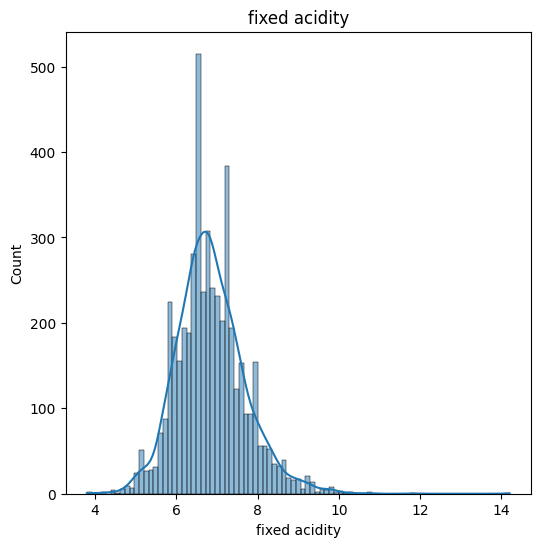

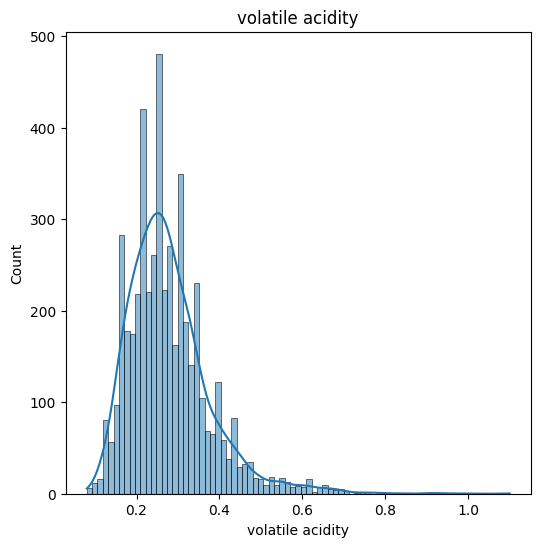

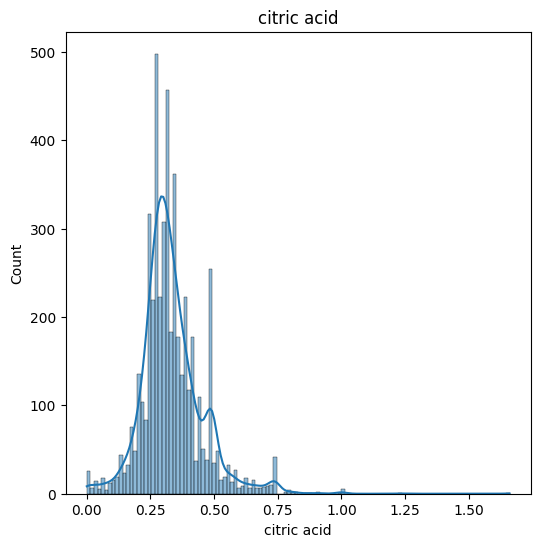

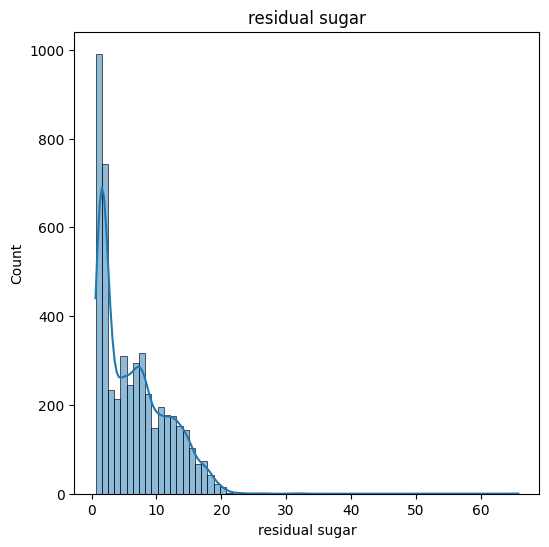

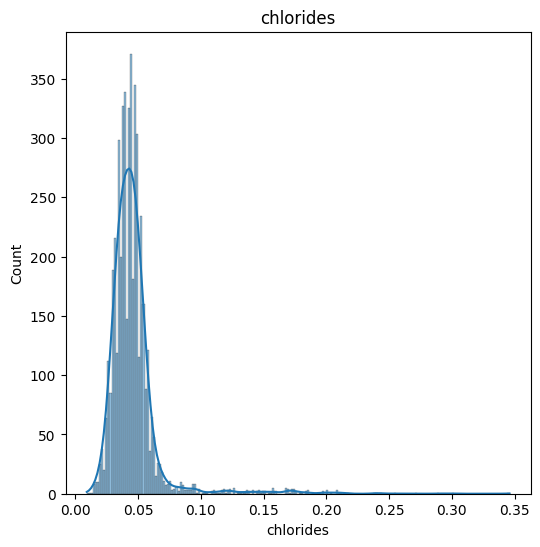

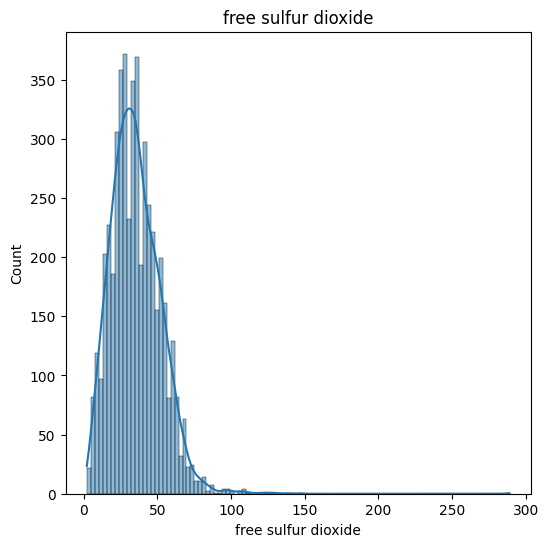

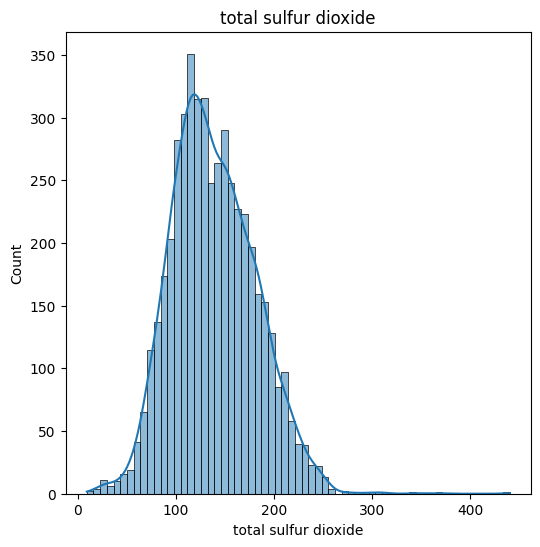

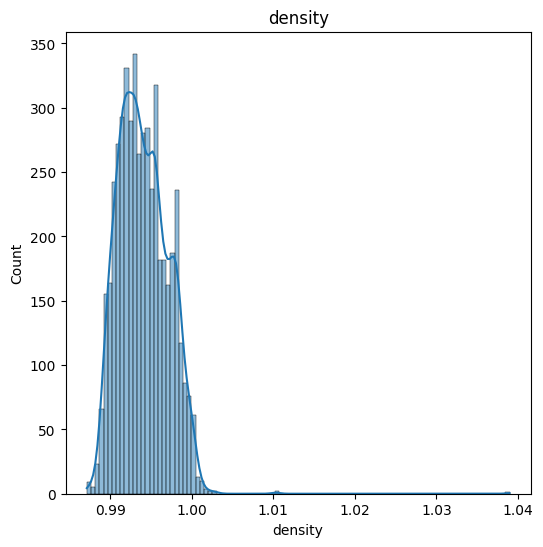

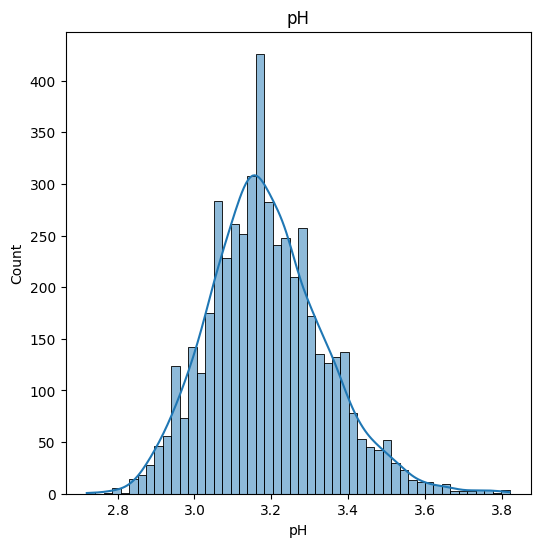

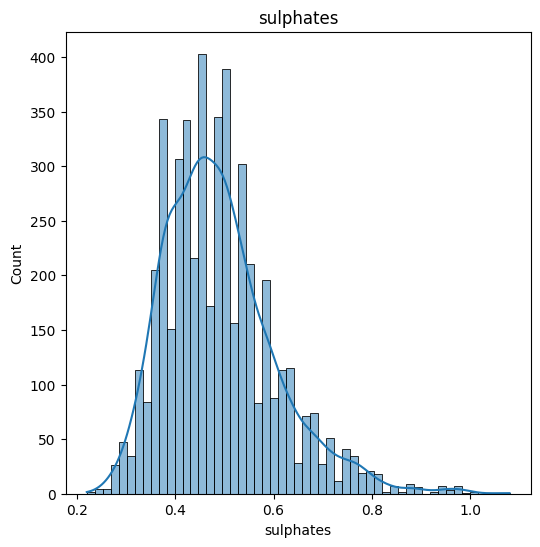

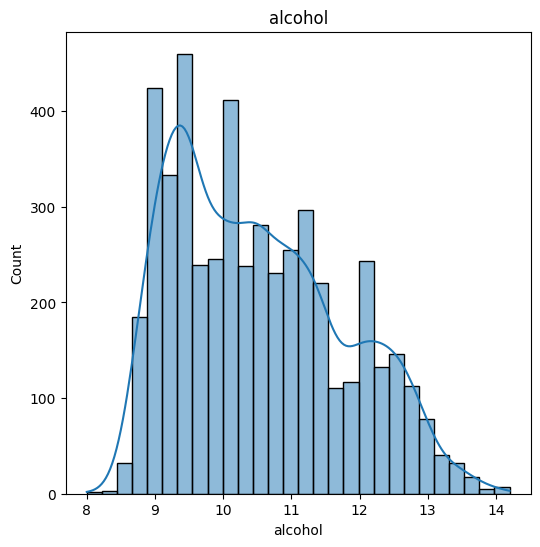

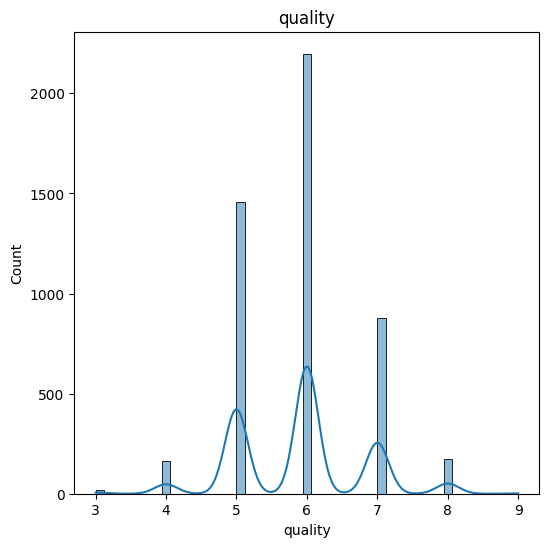

In [ ]:
for col in df.columns:
  plt.figure(figsize=(6,6))
  sns.histplot(df[col], kde=True)
  plt.title(col)
  plt.show()

<b>As most of the data is skewed we need to perform Standardization.

---



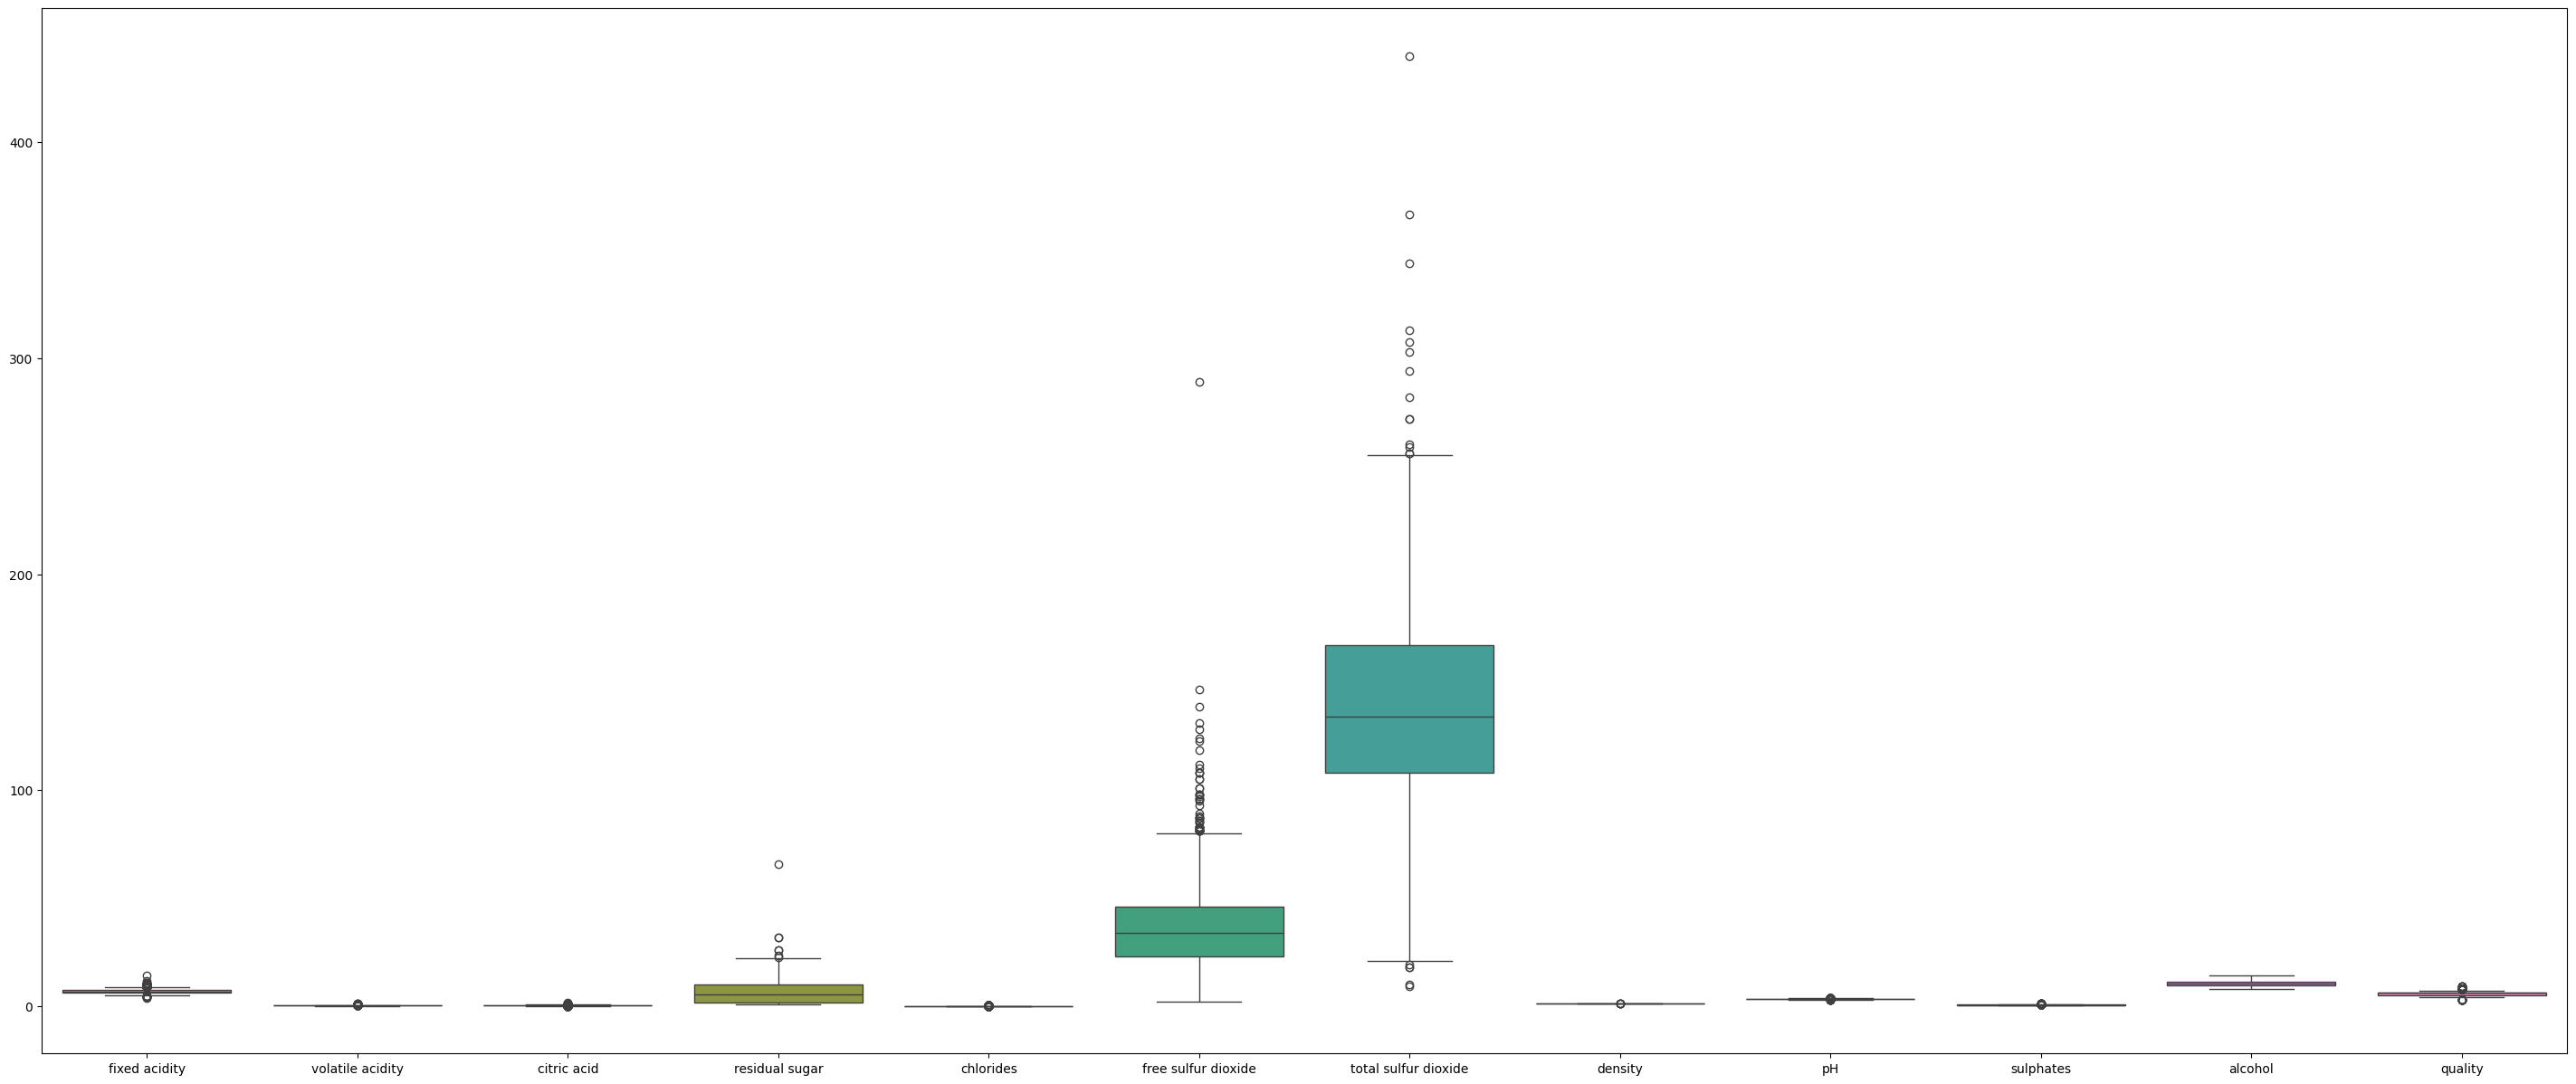

In [ ]:
plt.figure(figsize=(36,15))
sns.boxplot(data=df)
plt.show()

<b> Volatile Acidity,Citric Acid, Chlorides, pH and Sulphates are more prone to outliers and needs to be treated as well.

---

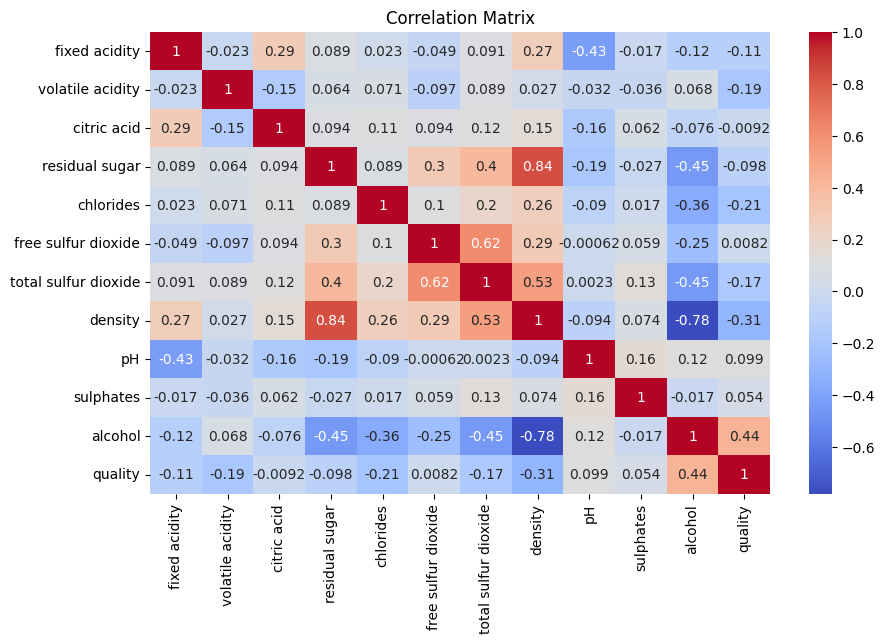

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<b> Density is highly correlated to other features which might cause multi-collinearity but if droppped only alchohol is the feature showing high correlation with target[Quality] which might cause lack in learning. Let's train the model and see.

---

### Train-Test Split

In [ ]:
X = df.drop('quality', axis=1)
y = df['quality']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Standardizing the data

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Setting up PySR

<b>Using parameters for selecting best model which also saves best model for analytics as per our requirements for computation and population.

Larger Populations(100-1000): Allows the algorithm to explore a broader range of potential solutions.

Smaller Populations(10-50): Faster Computation with less memory but may not explore the search space thoroughly.

n_iteration sets the limit of the model to keep running until further improvement

Use verbosity=False to hide logs of PySR

Use sympy to get the final equation

---

### Model1 with n_iterations = 15

In [ ]:
model = PySRRegressor(
    niterations=15,
    binary_operators=["+", "-"],
    unary_operators=["cos", "exp", "sin"],
    populations=30,
    model_selection="best",
    verbosity=False
)

In [ ]:
model.fit(X, y)
model

PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                       exp(density)   
	1   >>>>  2.661343                       6.1509323 - volatile_acidity   
	2         0.017930                           cos(alcohol) - -6.162922   
	3         0.071022                      sin(cos(alcohol)) - -6.125709   
	4         0.033851                 sin(sin(cos(alcohol))) - -6.125709   
	5         0.042144         exp(cos(alcohol) - 0.76868325) + 5.3884835   
	6         0.016527  5.3884835 + sin(exp(cos(alcohol)) - volatile_a...   
	7         0.009748  (sin(sin(cos(alcohol)) + density) - -5.587625)...   
	8         0.000545  (5.452351 - volatile_acidity) + exp(sin(cos(al...   
	9         0.000863  ((sin(sin(cos(alcohol)) + density) - -5.587625...   
	10        0.011968  (sin(sin(sin(cos(alcohol)) + 9.154188) + 3.560...   
	11        0.011743  ((sin(sin(cos(alcohol)) + (-3.9846244 + pH)) -...   
	12        0.000070  (5.2834845 - volatile_acidity) + exp(sin(sin(s...   
	13        0.001770  (5.2834845 - volatile_acidity) + exp(sin(sin(s...   
	
	         loss  complexity  
	0   10.874374           2  
	1    0.759622           3  
	2    0.746124           4  
	3    0.694971           5  
	4    0.671839           6  
	5    0.644113           7  
	6    0.633556           8  
	7    0.621324          10  
	8    0.620985          11  
	9    0.620450          12  
	10   0.613069          13  
	11   0.605912          14  
	12   0.605741          18  
	13   0.604670          19  
]

### Equation using SymPy for Model1

In [ ]:
model.sympy(1)

6.1509323 - volatile_acidity

<b>As Model1 gave the best pick at iteration2, we will reduce n_iterations but add more choice of unary and binary operators.

### Model2 with n_iterations = 5


In [ ]:
model2 = PySRRegressor(
    niterations=5,
    binary_operators=["+","*","-","/"],
    unary_operators=["cos", "sin", "tan"],
    populations=30,
    model_selection="best",
    verbosity=False
)

In [ ]:
model2.fit(X, y)
model2

PySRRegressor.equations_ = [
	   pick     score                                           equation  \
	0        0.000000                                     residual_sugar   
	1        0.058369                                     cos(0.5573272)   
	2  >>>>  3.581581                                0.5573272 * alcohol   
	3        0.000397                         alcohol * cos(-0.98155576)   
	4        0.131868                 (0.32589683 * alcohol) + 2.4659333   
	5        0.000703              2.57986 + (alcohol * sin(0.31905046))   
	6        0.000495     (2.4659333 * density) + (0.32589683 * alcohol)   
	7        0.034231  ((alcohol * 0.33892632) + (-6.5269966 / free_s...   
	8        0.000062  ((alcohol * 0.33892632) + ((((0.35718194 / -0....   
	
	        loss  complexity  
	0  27.644855           1  
	1  26.077429           2  
	2   0.725778           3  
	3   0.725490           4  
	4   0.635861           5  
	5   0.635414           6  
	6   0.635099           7  
	7   0.593074           9  
	8   0.592741          18  
]

### Mathematical Equation for Model 2

In [ ]:
model2.sympy(2)

0.5573272*alcohol

### Model 3 with n_iterations = 30

In [ ]:
model3 = PySRRegressor(
    niterations=30,
    binary_operators=["+","*","-","/"],
    unary_operators=["cos", "sin", "tan",
                     "sinh", "cosh", "tanh"],
    populations=30,
    model_selection="best",
    verbosity=False
)

In [ ]:
model3.fit(X, y)
model3

PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                    sinh(2.4714692)   
	1         0.031873                        6.156141 - volatile_acidity   
	2         0.017879                            cos(alcohol) + 6.159626   
	3   >>>>  0.160630                  2.582127 + (0.31345826 * alcohol)   
	4         0.024109  (0.31900677 * alcohol) + (2.8020291 - volatile...   
	5         0.004792  (2.8048582 + (alcohol * 0.31984413)) - tan(vol...   
	6         0.014046  ((0.31900677 * alcohol) + 2.8020291) - (fixed_...   
	7         0.000072  (2.8020291 + (0.31900677 * alcohol)) - sin(fix...   
	8         0.008018  (2.8020291 + (0.31900677 * alcohol)) - tan(sin...   
	9         0.039182  ((2.81209 + (0.34051958 * alcohol)) - (5.60634...   
	10        0.001762  ((2.81209 + (0.34051958 * alcohol)) - tan(sin(...   
	
	        loss  complexity  
	0   0.784195           2  
	1   0.759595           3  
	2   0.746135           4  
	3   0.635414           5  
	4   0.605502           7  
	5   0.602607           8  
	6   0.594202           9  
	7   0.594159          10  
	8   0.589414          11  
	9   0.566766          12  
	10  0.565768          13  
]

### Mathematical Equation for Model 3

In [ ]:
model3.sympy(3)

0.31345826*alcohol + 2.582127

## Conclusing and Findings

1. Model1 gives an equation with 11.58% error

2. Model2 gives an equation with 11.43% error

3. Model3 gives an equation with 11.14% error

4. PySr stops at early stages due to better scores but they are not the right equations.

5. If multiple unary operators are given, PySR performs better and with more number of iterations it performs even better.

6. Standardization does not create a lot of difference in performance




